<a href="https://colab.research.google.com/github/Unstopable18/Deep-Learning/blob/main/Cats_vs_Dogs%20(Colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:47<00:00, 24.6MB/s]
100% 1.06G/1.06G [00:47<00:00, 24.0MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import  Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import matplotlib.pyplot as plt

In [5]:
train=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/test',labels='inferred',label_mode='int',batch_size=32,image_size=(256,256)
)

test=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/test',labels='inferred',label_mode='int',batch_size=32,image_size=(256,256)
)

Found 5000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Normalize the above numpy array into (0-1)

In [6]:
def process(image,label):
    image=tf.cast(image/256.,tf.float32)
    return image,label
train=train.map(process)
test=test.map(process)

CNN Model

In [12]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history=model.fit(train,epochs=10,validation_data=test)

Epoch 1/10
157/157 [==============================] - 33s 133ms/step - loss: 0.7172 - accuracy: 0.5270 - val_loss: 0.6758 - val_accuracy: 0.5652
Epoch 2/10
157/157 [==============================] - 22s 139ms/step - loss: 0.6517 - accuracy: 0.6312 - val_loss: 0.5990 - val_accuracy: 0.6866
Epoch 3/10
157/157 [==============================] - 21s 129ms/step - loss: 0.5717 - accuracy: 0.7076 - val_loss: 0.4632 - val_accuracy: 0.7794
Epoch 4/10
157/157 [==============================] - 19s 122ms/step - loss: 0.4521 - accuracy: 0.7896 - val_loss: 0.3827 - val_accuracy: 0.8200
Epoch 5/10
157/157 [==============================] - 20s 125ms/step - loss: 0.3512 - accuracy: 0.8428 - val_loss: 0.2775 - val_accuracy: 0.8830
Epoch 6/10
157/157 [==============================] - 21s 129ms/step - loss: 0.1881 - accuracy: 0.9216 - val_loss: 0.1803 - val_accuracy: 0.9280
Epoch 7/10
157/157 [==============================] - 20s 124ms/step - loss: 0.1018 - accuracy: 0.9644 - val_loss: 0.1367 - val_ac

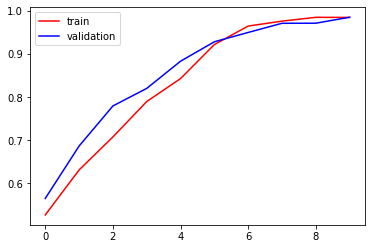

In [16]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

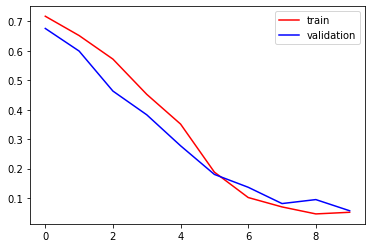

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [22]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history=model.fit(train,epochs=10,validation_data=test)

Epoch 1/10
157/157 [==============================] - 30s 160ms/step - loss: 3.4863 - accuracy: 0.5550 - val_loss: 3.1527 - val_accuracy: 0.5160
Epoch 2/10
157/157 [==============================] - 23s 142ms/step - loss: 1.0316 - accuracy: 0.5652 - val_loss: 0.8828 - val_accuracy: 0.5140
Epoch 3/10
157/157 [==============================] - 25s 159ms/step - loss: 0.6761 - accuracy: 0.5808 - val_loss: 0.7175 - val_accuracy: 0.6090
Epoch 4/10
157/157 [==============================] - 25s 158ms/step - loss: 0.6624 - accuracy: 0.5992 - val_loss: 0.6347 - val_accuracy: 0.6164
Epoch 5/10
157/157 [==============================] - 25s 159ms/step - loss: 0.6441 - accuracy: 0.6012 - val_loss: 0.7061 - val_accuracy: 0.6144
Epoch 6/10
157/157 [==============================] - 25s 158ms/step - loss: 0.6284 - accuracy: 0.6150 - val_loss: 0.5959 - val_accuracy: 0.6014
Epoch 7/10
157/157 [==============================] - 25s 158ms/step - loss: 0.6160 - accuracy: 0.6310 - val_loss: 1.0122 - val_ac

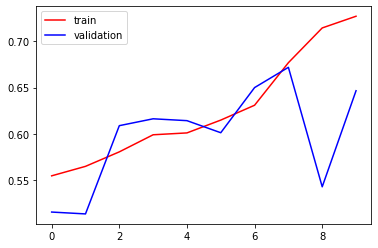

In [25]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

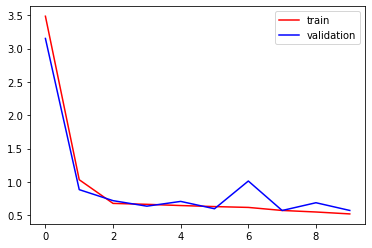

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 128)     

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history=model.fit(train,epochs=10,validation_data=test)

Epoch 1/10
157/157 [==============================] - 22s 126ms/step - loss: 0.6974 - accuracy: 0.5340 - val_loss: 0.6845 - val_accuracy: 0.5576
Epoch 2/10
157/157 [==============================] - 22s 134ms/step - loss: 0.6658 - accuracy: 0.5890 - val_loss: 0.6642 - val_accuracy: 0.6276
Epoch 3/10
157/157 [==============================] - 20s 123ms/step - loss: 0.6056 - accuracy: 0.6782 - val_loss: 0.5346 - val_accuracy: 0.7538
Epoch 4/10
157/157 [==============================] - 20s 125ms/step - loss: 0.5161 - accuracy: 0.7440 - val_loss: 0.3897 - val_accuracy: 0.8224
Epoch 5/10
157/157 [==============================] - 20s 129ms/step - loss: 0.3838 - accuracy: 0.8274 - val_loss: 0.2915 - val_accuracy: 0.8744
Epoch 6/10
157/157 [==============================] - 19s 120ms/step - loss: 0.2595 - accuracy: 0.8924 - val_loss: 0.1545 - val_accuracy: 0.9410
Epoch 7/10
157/157 [==============================] - 22s 139ms/step - loss: 0.1491 - accuracy: 0.9410 - val_loss: 0.1156 - val_ac

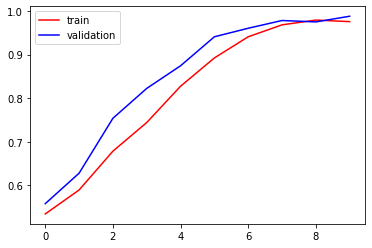

In [17]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

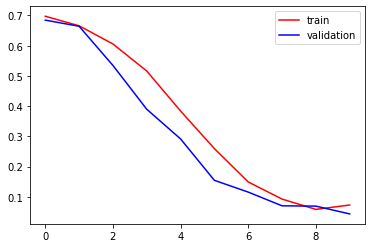

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()